#  Exercise on Missing Values and Outlier Analysis

We will learn to filter, study and mine data with this exercise. Let's go

In [4]:
# import libraries
# load the important libraries
import numpy as np
import pandas as pd

In [5]:
# loading the dataset
link = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# load the file using the link


In [13]:
df = pd.read_csv(link, index_col=0)

In [14]:
# find shape
df.shape

(891, 11)

In [15]:
# find info .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
# describe the data with .describe() and transpose with .T ! Do .describe().T
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# which column do you think are skewed or not normally distributed ? 


Check out 👉🏻 [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) 

In [18]:
# Find  number of missing values in each column
df.isna().mean()*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

### Analysing Missing values
1. If missing values > 30%:
   - We drop that column
2. If missing values are < 30 %:
   - We either delete the rows where the data is missing (only when removing does not adds bias to data.)
   - If we impute ( this is better option) 

In [19]:
df.drop(labels=['Cabin'], axis = 1, inplace=True)

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# missing values, when we focus on Embarked
df[ df.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


`Embarked` This column means the destination where they are going. 

In [22]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
df[ df.Age.isna()]['Name'].str.split().str[1].value_counts()

Mr.           117
Miss.          36
Mrs.           17
Master.         4
y               1
Dr.             1
Melkebeke,      1
Name: Name, dtype: int64

In [30]:
df[df['Name'].str.split().str[1] == 'Master.']['Age'].mean()

4.574166666666667

In [31]:
df.loc[(df.Age.isna()) & (df['Name'].str.split().str[1] == 'Master.'),'Age'   ] = 4.5

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S
177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S
710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,C


In [32]:
df[df.Ticket == "CA. 2343"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,S
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S


### What is target data imbalance ? How it affects the model?

One of the most prevalent problems faced by any one who is building classification models. You will find imabalance almost everywhere. 

In [33]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot: ylabel='Survived'>

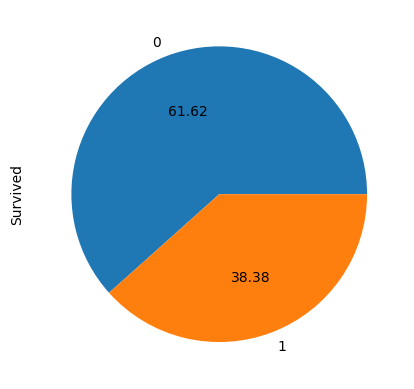

In [39]:
df.Survived.value_counts().plot.pie(autopct = '%.2f')

### Missing Value Analysis

In [32]:
# Drop the column which have more than 30% of missing values.

In [33]:
# Study the missing values and what do they signify


In [11]:
# For the rest try to impute them

In [40]:
df = df.dropna(how='any')

In [41]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Outlier Analysis

In [35]:
# plot individual columns and study the outliers there. 

In [42]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
# df.info()

In [50]:
# df.select_dtypes(include=['float64','int64','object'])

In [52]:
for i in df.columns:
    print ( i )

Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


In [55]:
for col in df.select_dtypes(include=['float64']).columns :
    
    

Age
Fare


<AxesSubplot: >

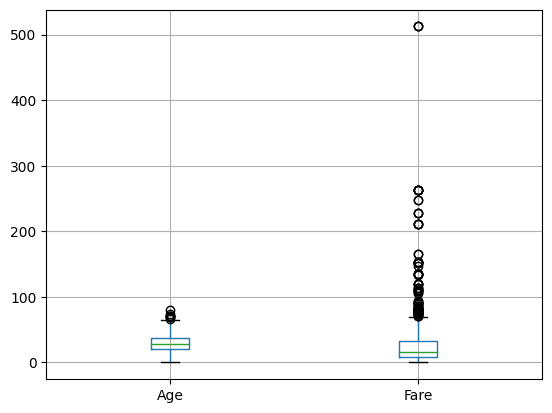

In [56]:
df.boxplot(column=['Age','Fare'])

### Handling the outliers
1. Either leave the outliers as they are.
2. capping them : setting all outliers above
   - \> Q3 + 1.5*IQR should be capped to max this value
   - < Q1 - 1.5*IQR should be capped at min this value
   

### EDA( Exploratory Data Analysis)

In [57]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot: xlabel='Survived,Sex'>

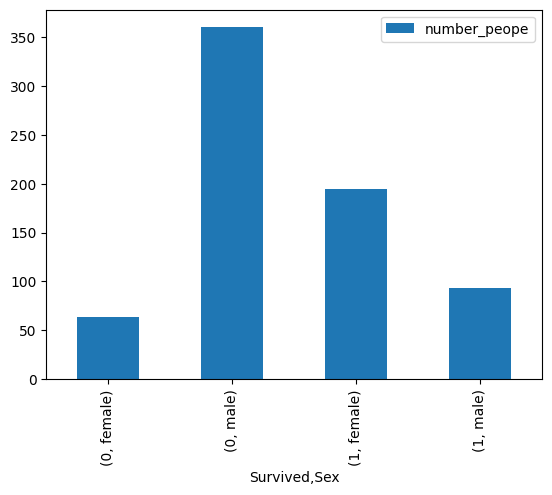

In [66]:
df.groupby(['Survived','Sex'])['Age'].agg(**{'number_peope':'count'}).plot.bar(stacked=True)

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

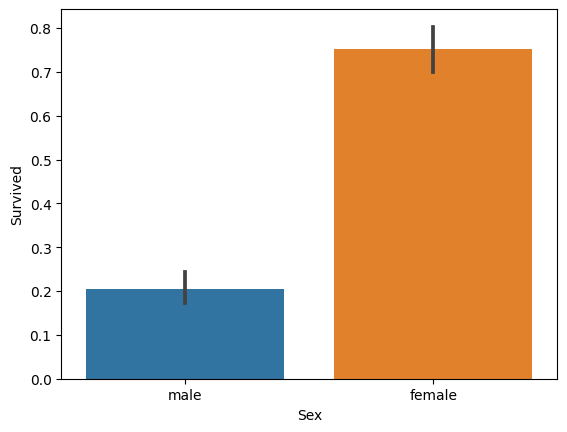

In [74]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Feature Engineering

In [75]:
df['total_member'] = df['SibSp'] + df['Parch']

In [76]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_member
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### Preparing Data for ML

1. Feature Encoding : Process of converting text into number is called Feature Encoding
   -  Categorical :
      - Nominal : Where there is no order like Gender -> Male and Femal
      - Ordinal : Categories have a order. ex -> low. medium, high or poor , middle, rich
  - NUmerical :
    - Discrete : Integer Column.Things which exist as whole numbers are discrete
    - Continous: continous column. Things which can exist in any amount is continous. ex - Age
2. Standardisation or Normalisation
3. Train Test Split

In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
train_df = pd.get_dummies(data=df , columns= ['Embarked','Sex']).drop(labels=['Name','Ticket'], axis = 1)

In [84]:
#Label encoder is used for Ordinal variabels
# One hot encoder is used for Nominal Variables

Label Encoder encodes every category as a number. Most important category gets a higher number. 
In our case `1` > `2` > `3` but according to the computer `3` > `2` > `1`. So when we are encdoing we need to change this order so that the computer understand that more importance should be given to category `1` . 

In [91]:
df.Pclass

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
886    3
887    2
888    1
890    1
891    3
Name: Pclass, Length: 712, dtype: int64

In [89]:
def label_encode(x):
    if x == 3:
        return 1
    elif x == 1:
        return 3
    else:
        return x

In [92]:
train_df['Pclass'] =   train_df['Pclass'].apply(label_encode)

In [93]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,total_member,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,0,1,22.0,1,0,7.2500,1,0,0,1,0,1
2,1,3,38.0,1,0,71.2833,1,1,0,0,1,0
3,1,1,26.0,0,0,7.9250,0,0,0,1,1,0
4,1,3,35.0,1,0,53.1000,1,0,0,1,1,0
5,0,1,35.0,0,0,8.0500,0,0,0,1,0,1


### 3. Train Test Split

In [102]:
from sklearn.model_selection import train_test_split
X = train_df.drop(labels=['Survived'],axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.22, random_state=12)

## Machine Learning

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [106]:
def train_model(model):
    # traning the model
    model.fit(X_train,y_train)
    # testing model
    pred = model.predict(X_test)
    
    # model evaluation
    print (classification_report(y_test,pred))
    plot_confusion_matrix(model,X_test,y_test)
    
    
    

Processing for model LogisticRegression() 

 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        93
           1       0.76      0.70      0.73        64

    accuracy                           0.79       157
   macro avg       0.78      0.78      0.78       157
weighted avg       0.79      0.79      0.79       157

Processing for model DecisionTreeClassifier() 

 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        93
           1       0.72      0.69      0.70        64

    accuracy                           0.76       157
   macro avg       0.76      0.75      0.75       157
weighted avg       0.76      0.76      0.76       157

Processing for model RandomForestClassifier() 

 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        93
           1       0.73      0.67      0.70        64

    accuracy                        

/Users/hasanali/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hasanali/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/hasanali/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        93
           1       0.75      0.64      0.69        64

    accuracy                           0.76       157
   macro avg       0.76      0.75      0.75       157
weighted avg       0.76      0.76      0.76       157



/Users/hasanali/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


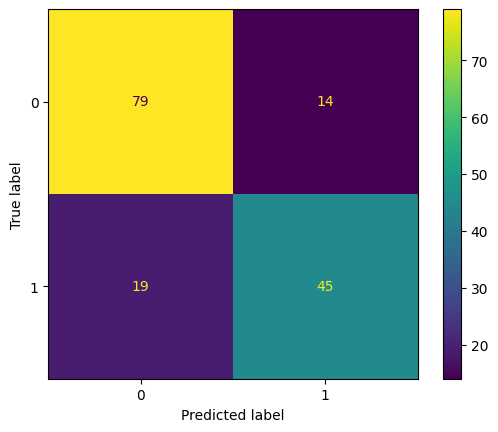

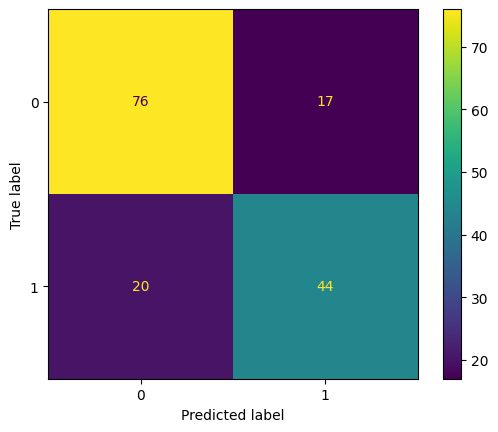

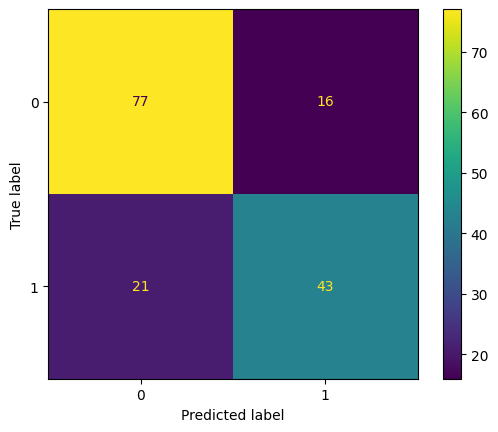

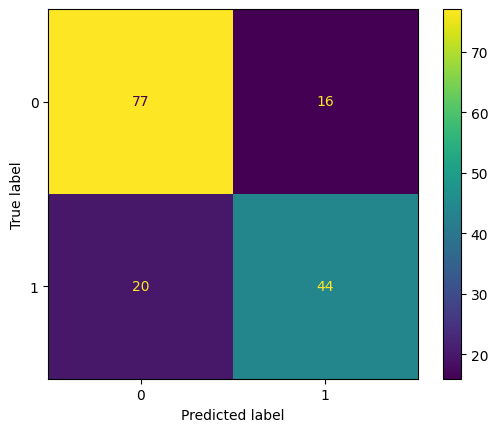

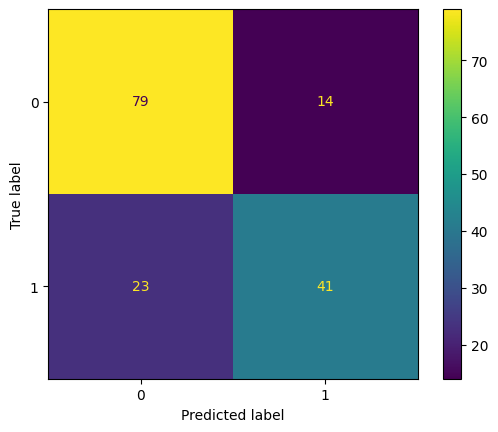

In [109]:
for model in [LogisticRegression(), 
          DecisionTreeClassifier(),
          RandomForestClassifier(),
         ExtraTreesClassifier(),
         KNeighborsClassifier()]:
    print (f"Processing for model {model} \n\n ")
    train_model( model )

1. Train on multiple models
2. Find out the model which is working best
3. We improve the model with hyperparameter tuning and cross validation. 

In [ ]:
# Hyper Parameter Truning and Cross Validation